<h3> SciPython/Practical_classes_5

Firstly, come back for a moment to Logistic Regression.

<h4> Exercise1: Open "logistic_regression" file that contains information about actual classes and predictions according to logistic regression model for subsequent observations.
    
- Calculate $S_n$ and $S_p$ values for 20 equally distant $p_c$ values from 0 to 1.
- Plot $ROC$ curve, mark a point with $p_c = 0.5$
- Calculate $AUC$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import trapz

In [ ]:
f = open("/content/logistic_regression", "r")
obs =[]
classes = []
p_pred = []
y_pred = []


for line in f:  #for every line in sequences file
    if line.startswith('O'):
        continue
    else:
        line = line.rstrip().split(',')

        obs.append(int(line[0]))
        classes.append(int(line[1]))
        p_pred.append(float(line[2]))

     

In [ ]:
import numpy as np

# critical values
pc_list = list(np.arange(0,1, 0.05))

sp_list = []
sn_list = []

for pc in pc_list:
    # calculate #TP, #TN, #FP and #FN
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(p_pred)):
        percent = p_pred[i]
        y = classes[i]
        if percent > pc and y == 1:
            TP += 1
        elif percent <= pc and y == 1:
            FN += 1
        elif percent > pc and y == 0:
            FP += 1
        elif percent <= pc and y == 0:
            TN += 1  

    # sn
    sn = TP/(TP+FN)
    sn_list.append(sn)

    # sp
    sp = TN/(TN+FP)
    sp_list.append(sp)

    # store values for pc = 0.5
    if pc == 0.5:
        x05 = [1 - sp]
        y05 = [sn]


In [ ]:
x_plot = [1]*len(sp_list)
x_plot = list(np.subtract(x_plot, sp_list))
x_plot

[1.0,
 0.9369747899159664,
 0.8529411764705882,
 0.76890756302521,
 0.6764705882352942,
 0.6008403361344538,
 0.5231092436974789,
 0.4159663865546218,
 0.31932773109243695,
 0.2226890756302521,
 0.15336134453781514,
 0.0714285714285714,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

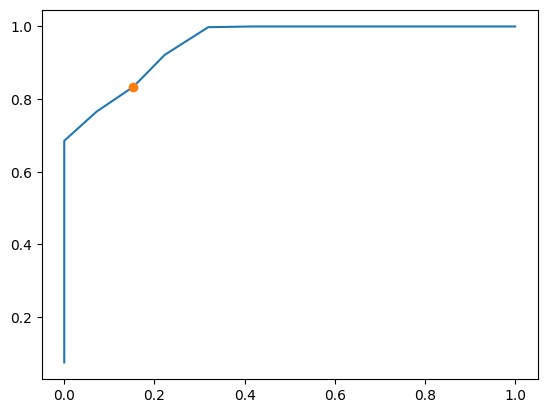

area = -0.9515203027775996


In [ ]:
plt.plot(x_plot, sn_list)
plt.plot(x05, y05, "-o")
plt.show()

area = trapz(sn_list, x_plot)
print("area =", area)

negative area? there might be something wrong 

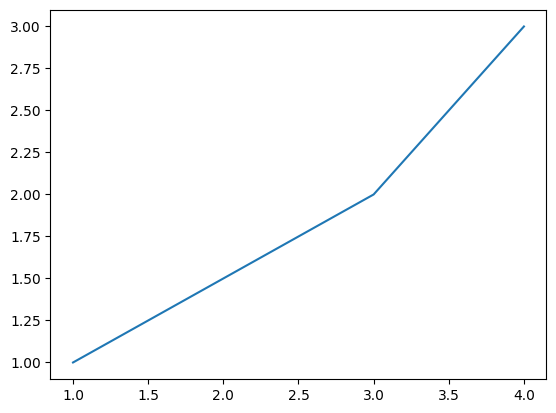

area = 5.5


In [ ]:
#how to calculate the area under the curve?

import numpy as np
import matplotlib.pyplot as plt
from numpy import trapz

x = np.array([1,3,4])
y = np.array([1,2,3])

plt.plot(x,y)
plt.show()

area = trapz(y, x)
print("area =", area)

# Support vector machine (SVM)

In [171]:
from sklearn import datasets
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<h4> Linear (traditional) SVM

In general case, our aim is to find a hyperplane $g(x)= w^Tx+w_0=0$, where $w=[w_1,...,w_N]$ - vector of weights for every feature, $w_0$ is a bias that separates the classes. Additionally:
<br>

- $w^Tx_i + w_0 >0$ for $x_i \in Class_1$,
- $w^Tx_i + w_0 <0$ for $x_i \in Class_2$.

The distance between a point $x$ and hyperplane $g$ is given by $\frac{g(x)}{|w|}$. If we normalize the parameters, we may assume that the margin should equals $1$ which provides the conditions:
<br>

- $w^Tx_i + w_0 >1$ for $x_i \in Class_1$,
- $w^Tx_i + w_0 <1$ for $x_i \in Class_2$.

or simply 

- $d_i(w^Tx_i + w_0) >1$

where $d_i$ is the label of $x_i$ (for the first class $d_i=1$, for the second class $d_i = -1$). In general, such separation may be not possible, so we introduce some modifications to these condtions:

- $d_i(w^Tx_i + w_0) >1 - \eta_i$

where $\eta_i$ are additional variables. 
- if $\eta_i >0$, then we decrease the margin of separation
- if $\eta \in (0,1)$, then data point $x_i$ is still on correct side, but exceeded the margin,
- if $\eta >1$, then data point $x_i$ is on wrong side. 


In python, there is $C$ parameter which reflects the impact of $\eta_i$ parameters (regularization).

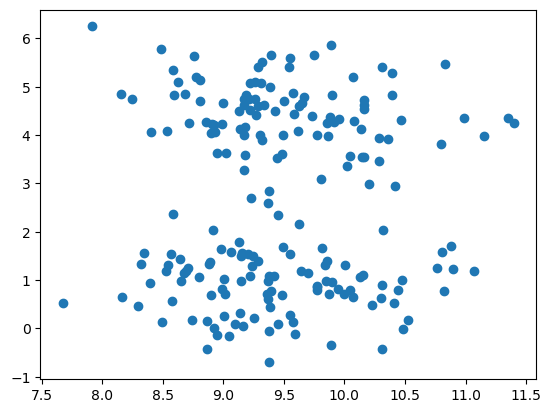

In [167]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
import numpy as np


X, y = make_blobs(n_samples=200, random_state=4,
                  n_features=2, centers = 2, 
                  cluster_std = 0.7) 

plt.scatter(X[:, 0], X[:, 1])
plt.show() 

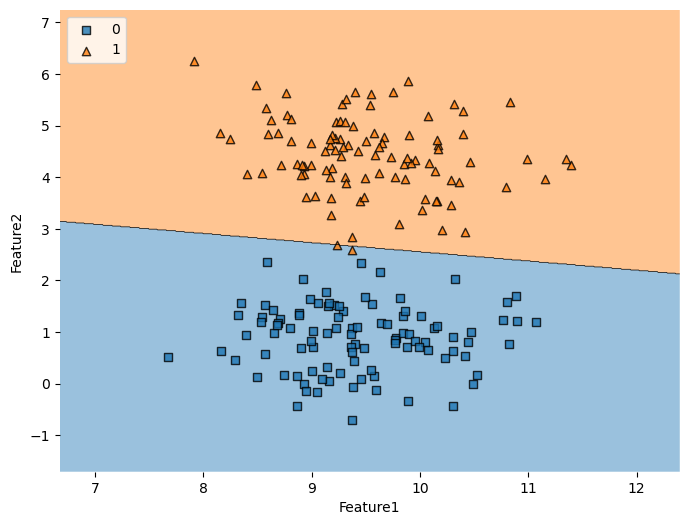

In [172]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X, y);


plt.figure(figsize=(8, 6))
plot_decision_regions(X=X, y=y, clf=svm)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper left')
plt.show()

In [173]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, svm.predict(X))

array([[100,   0],
       [  2,  98]])

In [174]:
from sklearn.metrics import classification_report

print(classification_report(y, svm.predict(X)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       1.00      0.98      0.99       100

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



<h4> Exercise2: Consider the previous data. Apply the SVM algorithm for different parameters C: 0.01, 10. Visualize and comment on the obtained results. How low and high $C$ values impact the final classifier?

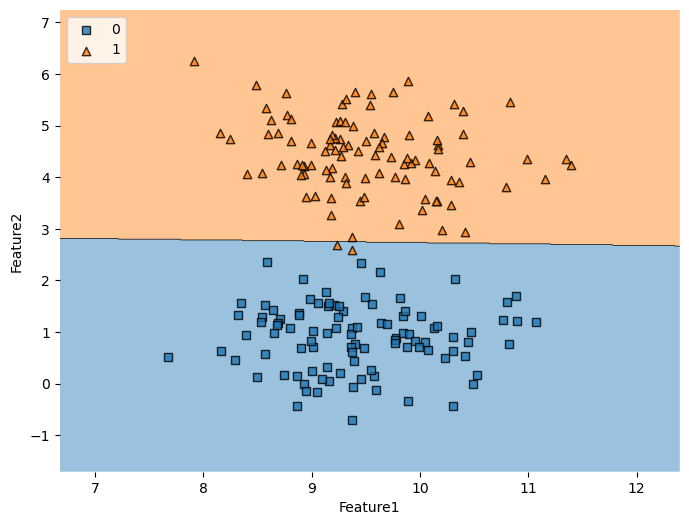

In [178]:
# exercise 2

svm = SVC(kernel='linear', C=0.00001, random_state=0)
svm.fit(X, y);

plt.figure(figsize=(8, 6))
plot_decision_regions(X=X, y=y, clf=svm)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper left')
plt.show()

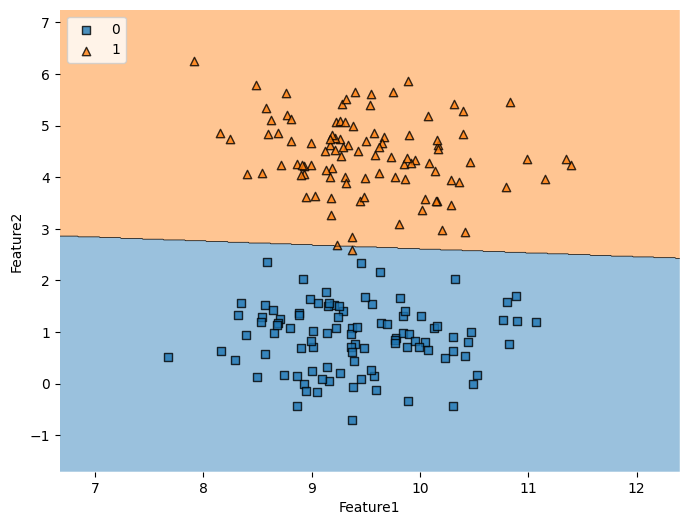

In [ ]:
# exercise 2

svm = SVC(kernel='linear', C=0.01, random_state=0)
svm.fit(X, y);

plt.figure(figsize=(8, 6))
plot_decision_regions(X=X, y=y, clf=svm)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper left')
plt.show()

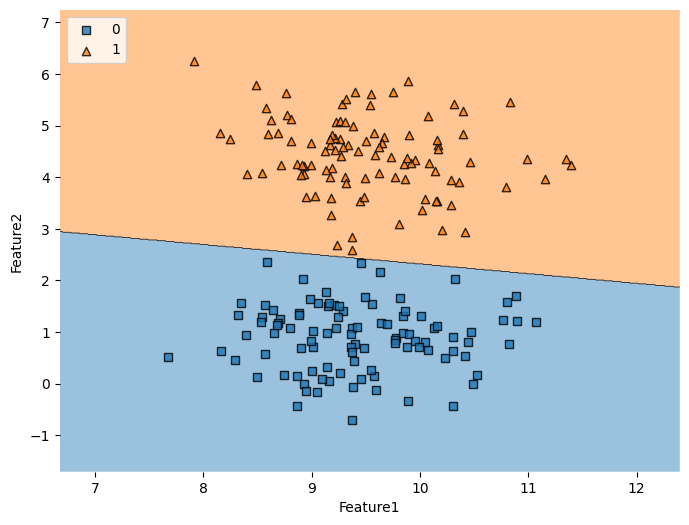

In [ ]:
# exercise 2

svm = SVC(kernel='linear', C=10, random_state=2)
svm.fit(X, y);

plt.figure(figsize=(8, 6))
plot_decision_regions(X=X, y=y, clf=svm)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper left')
plt.show()

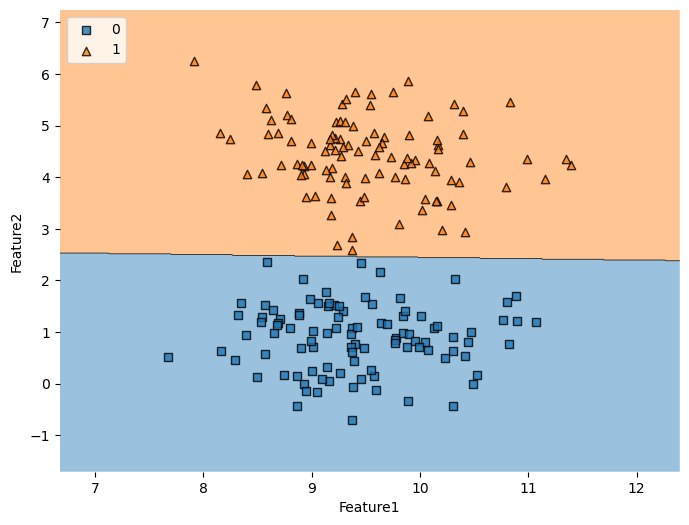

In [179]:
# exercise 2

svm = SVC(kernel='linear', C=10000, random_state=2)
svm.fit(X, y);

plt.figure(figsize=(8, 6))
plot_decision_regions(X=X, y=y, clf=svm)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper left')
plt.show()

c parameter controls the margin size vs classification error. high c values gives more penalty to errors, so the margin can be small and lead to overfitting which might be the case for the graph for C=10000. low c values can cause underfitting but in the example, C = 0.00001 didnt look so bad, it depends on the dataset distribution as well.

SVM may be used for more than two classes.

In [ ]:
#iris data
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

#trin/test spplit and standarization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_train_std, y_train);

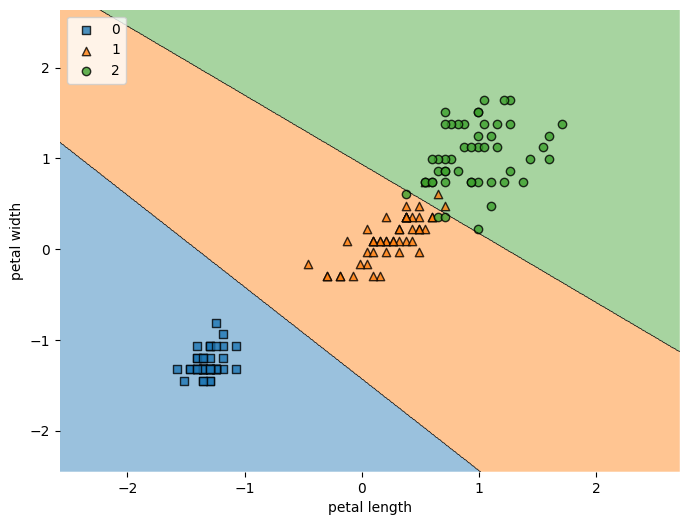

In [ ]:
plt.figure(figsize=(8, 6))

X_all = np.vstack( (X_train_std, X_test_std) )
y_all = np.hstack( (y_train, y_test) )
plot_decision_regions(X=X_all, y=y_all, clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

In [ ]:
svm.score(X_test_std, y_test) #accuracy

0.9777777777777777

<h4> Exercise3: Open "spam_ham.txt" file. It contains spam/ham messages. Every line starts with the class and contains one message.
    
- Is data balanced?
- Split the data into training and test sets (8:2)
- Use TF-IDF method for transforming the text into vectors (numbers).
- Build 3 models, based on: SVM, NaiveBayes and Logistic regression approaches.
- Compare the recall/precision and f1-score for boths classes. Make a comment.
- Which model seems to be the most robust to unbalance?
- Propose example solutions how to deal with unbalanced data. Apply one of them to SVM, NaiveBayes and Logistic regression models.

In [3]:
# exercise 3

# preparing dataset 

f = open("spam_ham.txt", "r")

sentences = []
classes = []

for line in f: 
    
    line = line.split(maxsplit = 1)
    # 1 for ham 0 for spam
    if line[0] == 'ham':
        classes.append(1)
    else:
        classes.append(0)
    sentences.append(line[1].rstrip())

sentences = np.array(sentences)
classes = np.array(classes)

In [4]:
print(len(classes[classes == 1]), len(classes[classes == 0]))
# the dataset is not balanced, there are ~7x more ham messages than spam

4827 747


In [5]:
# converting words to vectors

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(sentences)
feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense().tolist()

In [6]:
# splitting the data

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dense, classes, test_size=0.3, random_state=42)

In [7]:
# SVM

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [8]:
# SVMprediction

y_pred_svm = svm.predict(X_test)

In [19]:
tp_svm = ((y_pred_svm == 1) & (y_test == 1)).sum()
tn_svm = ((y_pred_svm == 0) & (y_test == 0)).sum()
fp_svm = ((y_pred_svm == 1) & (y_test == 0)).sum()
fn_svm = ((y_pred_svm == 0) & (y_test == 1)).sum()

In [20]:
psvm = tp_svm/(tp_svm+fp_svm)
rsvm = tp_svm/(tp_svm+fn_svm)

In [21]:
fsvm = 2*(psvm*rsvm)/(psvm+rsvm)
fsvm

0.9920989350738577

In [63]:
# logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [64]:
# logistic regression prediction

y_pred_lr = lr.predict(X_test)

In [57]:
# naive bayes

from sklearn.naive_bayes import GaussianNB 

nb = GaussianNB() 
nb.fit(X_train, y_train)

GaussianNB()

In [60]:
# naive bayes prediction

y_pred_nb = nb.predict(X_test)

In [71]:
predictions = [y_pred_svm,y_pred_lr, y_pred_nb]

In [77]:
# calculating f1

for model_pred in predictions:
    TP = 0
    TN = 0 
    FP = 0
    FN = 0
    for i in range(len(y_test)):
        pred = model_pred[i]
        y = y_test[i]   
        if pred == y and y == 1:
            TP += 1
        elif pred != y and y == 1:
            FN += 1
        elif pred != y and y == 0:
            FP += 1
        elif pred == y and y == 0:
            TN += 1    
            
    p = TP/(TP+FP)
    r = TP/(TP+FN)
    
    f1 = 2*(p*r)/(p+r)
    
    print(f1)
    
    

0.9920989350738577
0.9776725304465493
0.9429084380610413


the best model is SVM according to the f1-score, it looks more robust, but it might be overfitting. even it logistic regression's f1-score is high, it can create bias to the majority class (1-ham)
to deal with unbalanced data, we can 1) increase the quantity of the minority class or decrease the quantity of the majority class 2) use ensemble methods 3) use data augmentation techniques to change the samples and generate new samples 4) increase threshold to classify more sequences as 0-spam. Here I will try data augmentation with back-translation and masking

In [85]:
# back-translation

from translate import Translator

translator = Translator(to_lang="pl")  

def back_translate(text):
   
    translated_text = translator.translate(text)
    translator.to_lang = "en"  # change to english
    back_translated_text = translator.translate(translated_text)

    return back_translated_text


In [145]:
import random

def masking(text, mask_prob=0.25):
    words = text.split()

    # number of words to mask
    num_to_mask = int(len(words) * mask_prob)

    # randomly select words to mask
    indices_to_mask = random.sample(range(len(words)), num_to_mask)

    new_words = [word for i, word in enumerate(words) if i not in indices_to_mask]
    masked_text = " ".join(new_words)

    return masked_text


In [160]:
# augmentation

s2 = sentences
c2 = classes
for i in range(len(sentences)):
    if classes[i] == 0:
        back_translated = back_translate(sentences[i])
        s2 = np.append(s2, back_translated)
        c2 = np.append(c2, 0)  
        
        masked = masking(back_translated)
        s2 = np.append(s2, masked)
        c2 = np.append(c2, 0) 

In [ ]:
# it is better to do this after splitting the data because it might generate equal samples that are in testing and training dataset
# the training dataset should be independent of the test dataset

In [161]:
print(len(classes[classes==0]), len(c2[c2==0]))
print(len(classes[classes==1]), len(c2[c2==1]))

# more balanced

747 2241
4827 4827


In [162]:
# vectorizing again

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(s2)
d2 = vectors.todense().tolist()

# splitting dataset again

X_train, X_test, y_train, y_test = train_test_split(d2, c2, test_size=0.3, random_state=42)

In [163]:
# SVM

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_train, y_train)

# SVMprediction

y_pred_svm = svm.predict(X_test)

In [164]:
# logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

# logistic regression prediction

y_pred_lr = lr.predict(X_test)

In [165]:
# naive bayes

from sklearn.naive_bayes import GaussianNB 

nb = GaussianNB() 
nb.fit(X_train, y_train)

# naive bayes prediction

y_pred_nb = nb.predict(X_test)

In [166]:
predictions = [y_pred_svm,y_pred_lr, y_pred_nb]

# calculating f1

for model_pred in predictions:
    TP = 0
    TN = 0 
    FP = 0
    FN = 0
    for i in range(len(y_test)):
        pred = model_pred[i]
        y = y_test[i]   
        if pred == y and y == 1:
            TP += 1
        elif pred != y and y == 1:
            FN += 1
        elif pred != y and y == 0:
            FP += 1
        elif pred == y and y == 0:
            TN += 1    
            
    p = TP/(TP+FP)
    r = TP/(TP+FN)
    
    f1 = 2*(p*r)/(p+r)
    
    print(f1)
    
    

0.995169082125604
0.9805394332536702
0.938001458789205


the best model is still SVM and for logistic regression the data augmentation seems to work well. as for the naive bayes, the f1-score decreased after the data augmentation, but it's still high.

<h4> Kernel


Data is often not linearly separable, but linear classifiers can still work! Just apply the appropriate data transformation (kernel)


An example function, one of the most used is RBF, defined as $K(x,y) = -\exp(-\frac{1}{2\sigma^2} ||x-y||^2)= \exp( -\gamma ||x-y||^2)$

Other: polynomial, sigmoidal,...

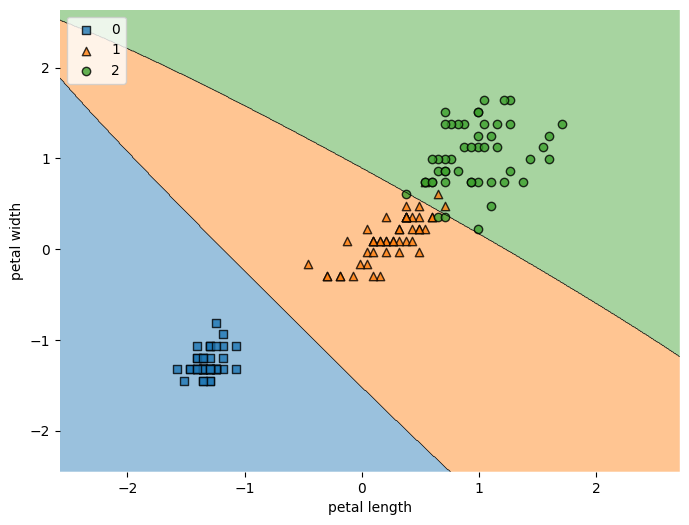

In [ ]:
svm = SVC(kernel='rbf', C=1., gamma=0.1, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

<h4> Exercise4: Try other $\gamma$ values ​​(e.g. 10, 50) for the data above. Comment the results in the context of the definition of the $\gamma$ parameter.

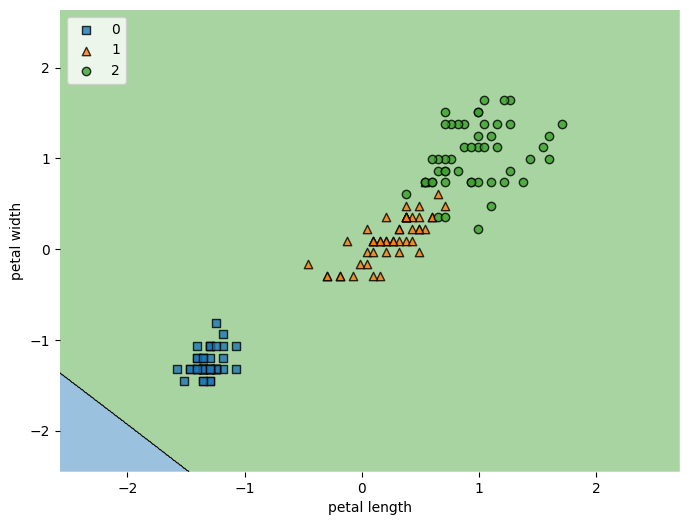

In [ ]:
# exercise 4

svm = SVC(kernel='rbf', C=1., gamma=0.001, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

# underfitting

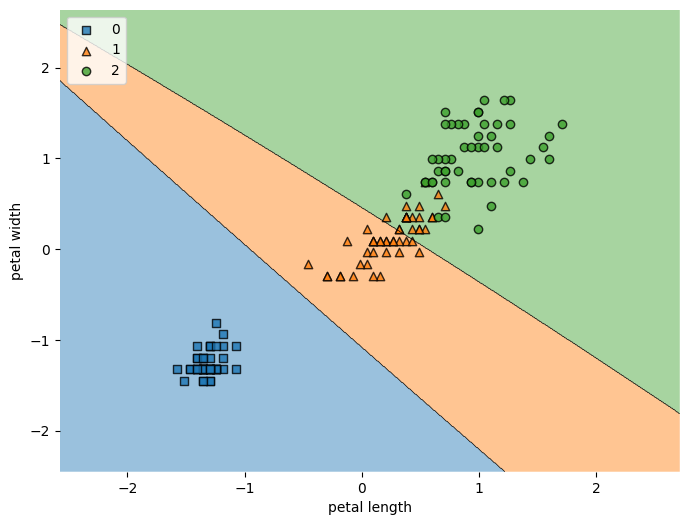

In [ ]:
svm = SVC(kernel='rbf', C=1., gamma=0.01, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

# good but not enough

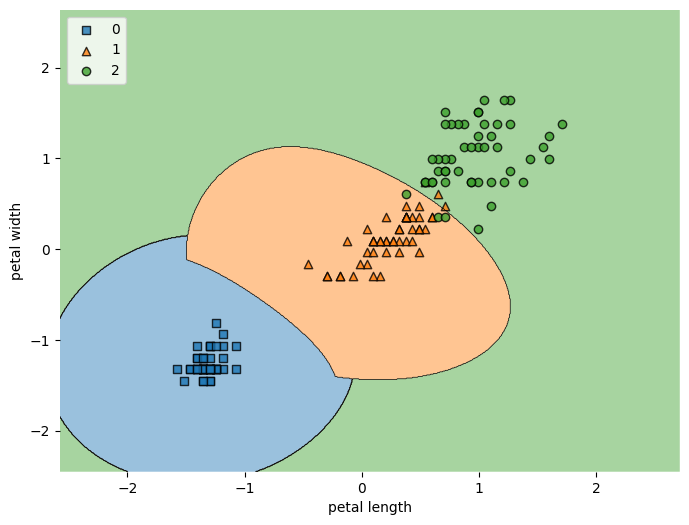

In [ ]:
svm = SVC(kernel='rbf', C=1., gamma=1, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

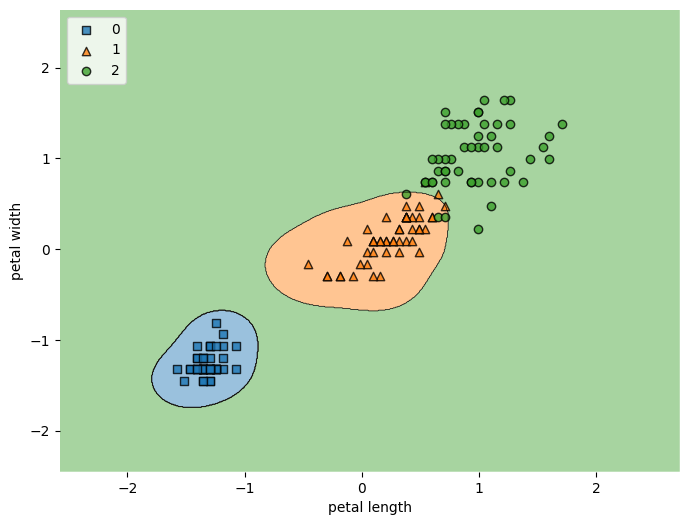

In [ ]:
svm = SVC(kernel='rbf', C=1., gamma=10, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

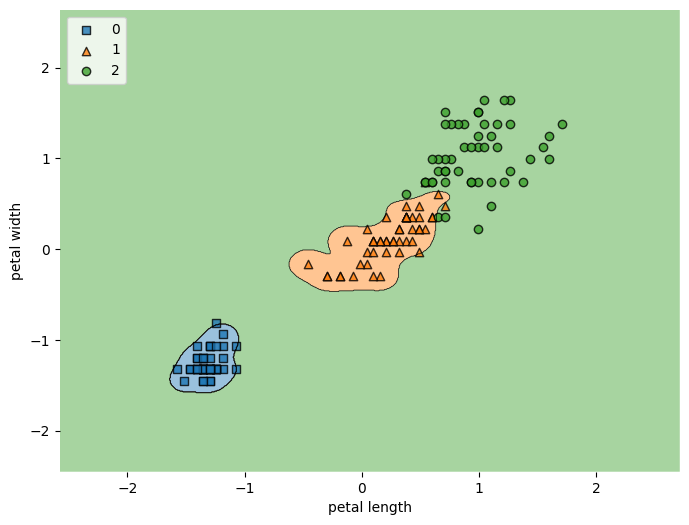

In [ ]:
svm = SVC(kernel='rbf', C=1., gamma=50, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

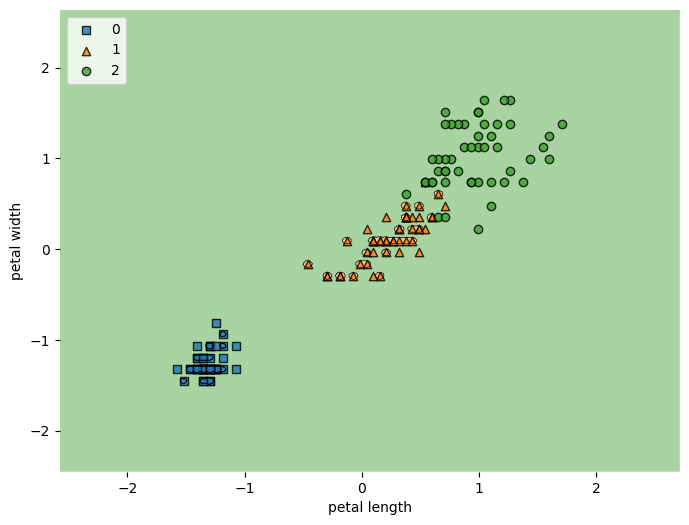

In [ ]:
svm = SVC(kernel='rbf', C=1., gamma=1000, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

smaller values of gamma can cause underfitting and bad performance, while higher values of gamma can cause overfitting, getting all the noise and outliers, and also quite slow to run

<h3> Face recognition


In [ ]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names) #persons (whose faces we will analyze)
print()
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']

(1348, 62, 47)


In [ ]:
62*47

2914

Each photo is $62 \times $47, or $2914$ pixels. That's a lot... We will use PCA (there will be more about PCA in the future, for now it is enough to know that the effect will be a reduced number of variables)

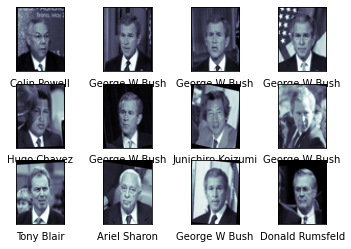

In [ ]:
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = "bone")
    axi.set(xticks = [], yticks = [],
           xlabel = faces.target_names[faces.target[i]])

In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pca = RandomizedPCA(n_components = 150, whiten = True, random_state = 42) #we will reduce the number of features to 150
svc = SVC(kernel = "rbf", random_state = 0)
model = Pipeline([('pca', pca), ('svc',svc)])

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.3, random_state=42)

param_grid = {"svc__C": [1, 5, 10, 50],
              "svc__gamma": [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)
grid = grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

{'svc__C': 5, 'svc__gamma': 0.005}

In [ ]:
grid.score(X_test, y_test)

0.7654320987654321

In [ ]:
m = grid.best_estimator_
yfit = m.predict(X_test)

In [ ]:
m

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=5, gamma=0.005, random_state=0))])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.71      0.77        17
     Colin Powell       0.85      0.79      0.81        84
  Donald Rumsfeld       0.69      0.56      0.62        36
    George W Bush       0.72      0.97      0.82       146
Gerhard Schroeder       0.72      0.64      0.68        28
      Hugo Chavez       0.80      0.30      0.43        27
Junichiro Koizumi       1.00      0.81      0.90        16
       Tony Blair       0.80      0.63      0.70        51

         accuracy                           0.77       405
        macro avg       0.80      0.67      0.72       405
     weighted avg       0.78      0.77      0.75       405



# Supplementary materials

<h3> Pipeline + Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline


pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{'clf__C':param_range, 'clf__kernel':['linear']},
              {'clf__C':param_range, 'clf__kernel':['rbf'], 'clf__gamma':param_range}]


gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1) #cv-cross validation

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
gs = gs.fit(X_train, y_train) 

In [ ]:
print(gs.best_score_, gs.best_params_, gs.score(X_test, y_test))

0.9527272727272728 {'clf__C': 0.1, 'clf__kernel': 'linear'} 0.9555555555555556
